In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples= []

In [3]:
for i in range(50):
    # younger person who experienced - 5%
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    #older person who didnt 5%
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)    
    
for i in range(1000):
    # younger person who didnt 95%
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #older person that did experience (95%)
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1) 

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_sample = scaler.fit_transform(train_samples.reshape(-1,1))

In [6]:
#note the model expects numpy array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
#sequential model is a linear stack of layers
model = Sequential([
    Dense(units = 16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=scaled_train_sample, y=train_labels, validation_split=0.1, epochs=30, batch_size=10, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2558 - accuracy: 0.9402 - val_loss: 0.2384 - val_accuracy: 0.9381
Epoch 2/30
189/189 - 0s - loss: 0.2551 - accuracy: 0.9402 - val_loss: 0.2356 - val_accuracy: 0.9476
Epoch 3/30
189/189 - 0s - loss: 0.2543 - accuracy: 0.9402 - val_loss: 0.2353 - val_accuracy: 0.9476
Epoch 4/30
189/189 - 0s - loss: 0.2539 - accuracy: 0.9402 - val_loss: 0.2348 - val_accuracy: 0.9476
Epoch 5/30
189/189 - 0s - loss: 0.2529 - accuracy: 0.9434 - val_loss: 0.2364 - val_accuracy: 0.9381
Epoch 6/30
189/189 - 0s - loss: 0.2522 - accuracy: 0.9450 - val_loss: 0.2346 - val_accuracy: 0.9476
Epoch 7/30
189/189 - 0s - loss: 0.2516 - accuracy: 0.9365 - val_loss: 0.2333 - val_accuracy: 0.9476
Epoch 8/30
189/189 - 0s - loss: 0.2512 - accuracy: 0.9455 - val_loss: 0.2331 - val_accuracy: 0.9476
Epoch 9/30
189/189 - 0s - loss: 0.2507 - accuracy: 0.9397 - val_loss: 0.2325 - val_accuracy: 0.9476
Epoch 10/30
189/189 - 0s - loss: 0.2501 - accuracy: 0.9407 - val_loss: 0.2321 - val_accuracy: 0.9476

In [13]:
#Building the validation set - predicting on the out of sample set for each epochs learning, shuffle your data beforetraining

#Running with the test data - INference - -Out of sample set -  test set
test_labels = []
test_samples= []

for i in range(50):
    # younger person who experienced - 5%
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    #older person who didnt 5%
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)    
    
for i in range(1000):
    # younger person who didnt 95%
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #older person that did experience (95%)
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1) 
    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, train_samples = shuffle(test_labels, test_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Predict

In [14]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [15]:
for i in predictions:
    print(i)

[0.9656321  0.03436793]
[0.2897846  0.71021545]
[0.93887556 0.06112449]
[0.07394926 0.9260507 ]
[0.92099303 0.07900702]
[0.2897846  0.71021545]
[0.9652708  0.03472916]
[0.43168572 0.56831425]
[0.63497686 0.36502317]
[0.05998816 0.9400118 ]
[0.96578395 0.03421606]
[0.01311142 0.9868885 ]
[0.96337235 0.03662764]
[0.04852474 0.9514752 ]
[0.7993492  0.20065077]
[0.10053834 0.8994617 ]
[0.93887556 0.06112449]
[0.38174972 0.6182503 ]
[0.8811835  0.11881648]
[0.02037781 0.97962224]
[0.92099303 0.07900702]
[0.43168572 0.56831425]
[0.9658848  0.03411518]
[0.12270475 0.87729526]
[0.5347751  0.46522486]
[0.02037782 0.97962224]
[0.9125481  0.08745191]
[0.04852474 0.9514752 ]
[0.83052933 0.16947062]
[0.00842019 0.9915799 ]
[0.92099303 0.07900702]
[0.2897846  0.71021545]
[0.8577266  0.14227341]
[0.3341935  0.66580653]
[0.9647131  0.03528684]
[0.07394926 0.9260507 ]
[0.68152285 0.31847712]
[0.1512238 0.8487762]
[0.7247067 0.2752933]
[0.01825636 0.9817437 ]
[0.96578395 0.03421606]
[0.11113892 0.888861

[0.9654796  0.03452044]
[0.21236427 0.78763574]
[0.96493727 0.03506273]
[0.05397016 0.9460298 ]
[0.9654796  0.03452044]
[0.1512238 0.8487762]
[0.7640623  0.23593765]
[0.03154368 0.9684563 ]
[0.83052933 0.16947062]
[0.03154368 0.9684563 ]
[0.9571513  0.04284868]
[0.17977332 0.8202267 ]
[0.96037877 0.03962127]
[0.1512238 0.8487762]
[0.96553046 0.03446952]
[0.02536915 0.9746309 ]
[0.9647131  0.03528684]
[0.3341935  0.66580653]
[0.96537745 0.03462247]
[0.17977332 0.8202267 ]
[0.9125481  0.08745191]
[0.01050992 0.9894901 ]
[0.9652708  0.03472916]
[0.12270475 0.87729526]
[0.9125481  0.08745191]
[0.03515393 0.9648461 ]
[0.95879525 0.04120474]
[0.01464341 0.9853566 ]
[0.9654286  0.03457142]
[0.10053834 0.8994617 ]
[0.7993492  0.20065077]
[0.01311142 0.9868885 ]
[0.96516    0.03484001]
[0.05998816 0.9400118 ]
[0.9497773  0.05022268]
[0.09084549 0.90915453]
[0.9652708  0.03472916]
[0.03515393 0.9648461 ]
[0.9647131  0.03528684]
[0.07394926 0.9260507 ]
[0.96553046 0.03446952]
[0.17977332 0.820226

[0.10053834 0.8994617 ]
[0.9497773  0.05022268]
[0.05998816 0.9400118 ]
[0.96553046 0.03446952]
[0.24906929 0.7509307 ]
[0.9334828 0.0665172]
[0.02536915 0.9746309 ]
[0.96537745 0.03462247]
[0.01825636 0.9817437 ]
[0.9646085  0.03539143]
[0.05998816 0.9400118 ]
[0.7640623  0.23593765]
[0.03515393 0.9648461 ]
[0.96504873 0.03495121]
[0.01311142 0.9868885 ]
[0.95879525 0.04120474]
[0.1512238 0.8487762]
[0.96532613 0.03467386]
[0.02037782 0.97962224]
[0.7247067 0.2752933]
[0.07394926 0.9260507 ]
[0.96190375 0.03809622]
[0.10053834 0.8994617 ]
[0.96537745 0.03462247]
[0.02829335 0.97170657]
[0.9649931  0.03500693]
[0.06662995 0.93337   ]
[0.5347751  0.46522486]
[0.01635205 0.983648  ]
[0.68152285 0.31847712]
[0.03515393 0.9648461 ]
[0.96504873 0.03495121]
[0.07394926 0.9260507 ]
[0.5857628  0.41423717]
[0.01825636 0.9817437 ]
[0.9275596  0.07244041]
[0.24906929 0.7509307 ]
[0.9334828 0.0665172]
[0.24906929 0.7509307 ]
[0.96493727 0.03506273]
[0.06662995 0.93337   ]
[0.96583444 0.03416558]


[0.12270475 0.87729526]
[0.9428394  0.05716058]
[0.03916062 0.96083933]
[0.8999785  0.10002148]
[0.03916062 0.96083933]
[0.8577266  0.14227341]
[0.06662995 0.93337   ]
[0.96190375 0.03809622]
[0.13529097 0.864709  ]
[0.7993492  0.20065077]
[0.24906929 0.7509307 ]
[0.83052933 0.16947062]
[0.11113892 0.8888611 ]
[0.9571513  0.04284868]
[0.24906929 0.7509307 ]
[0.8999785  0.10002148]
[0.05397016 0.9460298 ]
[0.7247067 0.2752933]
[0.00940775 0.9905923 ]
[0.9125481  0.08745191]
[0.00940775 0.9905923 ]
[0.96493727 0.03506273]
[0.11113892 0.8888611 ]
[0.92099303 0.07900702]
[0.02274012 0.9772599 ]
[0.7247067 0.2752933]
[0.43168572 0.56831425]
[0.5857628  0.41423717]
[0.04360341 0.9563966 ]
[0.9658848  0.03411518]
[0.05998816 0.9400118 ]
[0.96553046 0.03446952]
[0.03916062 0.96083933]
[0.96568274 0.03431723]
[0.02829335 0.97170657]
[0.5347751  0.46522486]
[0.01050992 0.9894901 ]
[0.9656321  0.03436793]
[0.01825636 0.9817437 ]
[0.96476936 0.03523068]
[0.02037781 0.97962224]
[0.5347751  0.465224

[0.02829335 0.97170657]
[0.9654286  0.03457142]
[0.17977332 0.8202267 ]
[0.9654796  0.03452044]
[0.08200194 0.91799814]
[0.92099303 0.07900702]
[0.13529098 0.864709  ]
[0.9654286  0.03457142]
[0.05998816 0.9400118 ]
[0.94656086 0.05343908]
[0.2897846  0.71021545]
[0.48305 0.51695]
[0.01464341 0.9853566 ]
[0.9658848  0.03411518]
[0.01050992 0.9894901 ]
[0.63497686 0.36502317]
[0.00753551 0.99246454]
[0.9428394  0.05716058]
[0.01464341 0.9853566 ]
[0.9652154  0.03478454]
[0.11113892 0.8888611 ]
[0.9652154  0.03478454]
[0.1512238 0.8487762]
[0.94656086 0.05343908]
[0.03154368 0.9684563 ]
[0.9655813  0.03441869]
[0.08200194 0.91799814]
[0.96402234 0.03597763]
[0.13529097 0.864709  ]
[0.96532613 0.03467386]
[0.43168572 0.56831425]
[0.96578395 0.03421606]
[0.2897846  0.71021545]
[0.9649931  0.03500693]
[0.43168572 0.56831425]
[0.9649931  0.03500693]
[0.09084549 0.90915453]
[0.9647131  0.03528684]
[0.05397016 0.9460298 ]
[0.7993492  0.20065077]
[0.01173968 0.9882604 ]
[0.9646085  0.03539143]


In [57]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [58]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [59]:
#using the confusion matrix to visualize results during inference - checking the labels
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [60]:
cm =  confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [61]:

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    THis function prints and plots the confusion matrix
    Normalization cn be applied by setting `normalize=True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    tresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j,cm[i,j],
                    horizontalalignment="center",
                    color="white" if cm[i,j] > tresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
cm_plot_labels=['no_sde_effects', 'had_side_effects']

Confusion matrix without normalization
[[509 541]
 [527 523]]


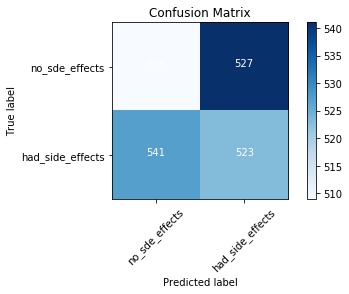

In [63]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [81]:
import os.path
if os.path.isfile('/home/dami/keras-TF/medical_trial_model.h5') is False:
    model.save('/home/dami/keras-TF/medical_trial_model.h5') 

# saves all the parameters and hyperparameters/configurations, optimizer etc


In [82]:

from tensorflow.keras.models import load_model
new_model = load_model('/home/dami/keras-TF/medical_trial_model.h5')

In [83]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [84]:
new_model.get_weights()

[array([[-0.12460947, -0.52924895, -0.02409405, -0.20047224,  0.4984999 ,
         -0.17229727, -0.44032073,  0.6292295 ,  0.64538556, -0.1293253 ,
          0.4916693 ,  0.35577196, -0.02859661, -0.4483059 ,  0.663937  ,
         -0.42937094]], dtype=float32),
 array([ 0.        ,  0.        ,  0.19372778,  0.        , -0.20092818,
         0.        ,  0.        , -0.16568182, -0.0811412 ,  0.        ,
        -0.17042182, -0.1547718 ,  0.19318053,  0.        , -0.19029127,
         0.        ], dtype=float32),
 array([[ 0.09840134,  0.3232778 , -0.23419832, -0.20965722,  0.32291606,
          0.02873784, -0.26368374, -0.34974036, -0.17729147, -0.0448966 ,
          0.067687  , -0.02045327,  0.18836376, -0.19978331, -0.28631735,
          0.30462256, -0.22406276,  0.27576962, -0.19180904,  0.07523406,
         -0.14499165, -0.09887668,  0.17709294,  0.30824968, -0.0312126 ,
          0.01507711,  0.22789004,  0.03755015, -0.28485748,  0.23963836,
          0.07062766,  0.24716118],
 

In [85]:
new_model.optimizer

 ### Model to JSON
   This only saves the architecture of the model and not the configurations and parameters

In [86]:
json_string = model.to_json()

In [87]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [88]:
from tensorflow.keras.models import model_from_json
model_arch = model_from_json(json_string)

In [89]:
model_arch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [90]:
# model.save_weights()
# model to_yaml